# Predicción del precio de los coches

## Aplicación y comparación de modelos de machine learning

En este script se corren diferentes modelos para predecir el precio de los coches.

Junio 2020

In [79]:
## Importamos todas las paqueterías a utilizar

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.float_format = '{:,.2f}'.format

# índice

1. [Modelo 1: con Odometer y Year](#1.-Modelo-1:-con-Odometer-y-Year)<br>
    1.1. [Tree](#1.1-Tree)<br>
    1.2. [Random Forest](#1.2-Random-Forest)<br>
    1.3. [Gradient Boosting](#1.3-Gradient-Boosting)<br>
    1.4.  [XGBoost](#1.4-XGBoost)<br>
    1.5. [Modelo Lineal](#1.5-Modelo-Lineal)<br>
2. [Modelo 2: con todas las variables](#2.-Modelo-2:-con-todas-las-variables)<br>
    2.1. [Tree](#2.1-Tree)<br>
    2.2. [Random Forest](#2.2-Random-Forest)<br>
    2.3. [Gradient Boosting](#2.3-Gradient-Boosting)<br>
    2.4. [XGBoost](#2.4-XGBoost)<br>
    2.5. [Modelo Lineal](#2.5-Modelo-Lineal)<br>
3. [Comparación de modelos](#3.-Comparación-de-modelos)

In [80]:
# Cargamos la base de datos
usedcars = pd.read_csv(r'D:\francisco_madrigal\Desktop\ITAM\Verano 2020\Data Science\Tarea 2\usedcars.csv')

# Se utiliza una muestra aleatoria para no consumir tanta memoria y poder sacar los reusltados en una fracción del tiempo
usedcars = usedcars.sample(frac = 0.01, random_state = 32)

In [81]:
## Exploramos la base de datos
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4358 entries, 321867 to 67801
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4358 non-null   int64  
 1   url           4358 non-null   object 
 2   region        4358 non-null   object 
 3   region_url    4358 non-null   object 
 4   price         4358 non-null   int64  
 5   year          4353 non-null   float64
 6   manufacturer  4168 non-null   object 
 7   model         4298 non-null   object 
 8   condition     2487 non-null   object 
 9   cylinders     2685 non-null   object 
 10  fuel          4332 non-null   object 
 11  odometer      3554 non-null   float64
 12  title_status  4346 non-null   object 
 13  transmission  4335 non-null   object 
 14  vin           2313 non-null   object 
 15  drive         3099 non-null   object 
 16  size          1347 non-null   object 
 17  type          3168 non-null   object 
 18  paint_color   2972 non

In [82]:
## Imprimimos las primera 5 columnas
usedcars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
321867,7114452416,https://huntsville.craigslist.org/cto/d/athens...,huntsville / decatur,https://huntsville.craigslist.org,5400,"2,007.00",toyota,prius,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00X0X_6rwTuDlSfD...,"2007 prius, well maintained, 2nd owner. Any qu...",nan,al,34.73,-87.01
19846,7109710140,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,19999,"2,014.00",ford,f-150,NaN,8 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00b0b_gn4nW05CBT...,2014 Ford F-150 FX4 Truck STOCK #: F2...,nan,wa,48.76,-122.47
309748,7115296284,https://bham.craigslist.org/ctd/d/alexandria-2...,birmingham,https://bham.craigslist.org,19995,"2,004.00",ford,f250 fx4,excellent,8 cylinders,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00d0d_lg8lh2DLxr...,2004 *** FORD F250 FX4 CREW CAB SD *** Won't l...,nan,al,33.78,-85.94
306075,7120681428,https://denver.craigslist.org/ctd/d/englewood-...,denver,https://denver.craigslist.org,13599,"2,012.00",toyota,highlander,NaN,6 cylinders,...,4wd,NaN,SUV,white,https://images.craigslist.org/00h0h_2pzg9L1INm...,Use this link to see more information on this ...,nan,co,39.58,-104.86
375072,7114898809,https://salem.craigslist.org/ctd/d/wilsonville...,salem,https://salem.craigslist.org,12156,"2,015.00",dodge,journey,NaN,6 cylinders,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00000_eGyYasSJ15...,Findlay Wilsonville CJDR STOCK #: P2...,nan,or,45.33,-122.76


In [83]:
usedcars.describe()

,id,price,year,odometer,county,lat,long
count,"4,358.00","4,358.00","4,353.00","3,554.00",0.00,"4,287.00","4,287.00"
mean,"7,116,064,717.91","12,859.99","2,009.94","102,454.73",nan,38.45,-94.91
std,"4,565,085.73","11,917.00",8.79,"173,134.94",nan,6.10,18.18
min,"7,105,648,489.00",0.00,"1,927.00",0.00,nan,-14.64,-159.39
25%,"7,112,619,561.00","4,988.00","2,007.00","48,799.50",nan,34.23,-111.29
50%,"7,117,296,581.00","9,895.00","2,012.00","92,327.00",nan,39.09,-89.15
75%,"7,120,132,337.00","17,990.00","2,015.00","137,099.00",nan,42.48,-81.28
max,"7,121,602,925.00","187,991.00","2,020.00","9,208,483.00",nan,64.84,-69.15


# 1. Modelo 1: con Odometer y Year

Primero hacemos un modelo tree sin más que el train y test set

In [84]:
## Creamos las series de Y y X

## Como el DataFrame no está completo, filtramoes primero un dataframe en donde quitemos cualquier valor Nulo de Precio, Odometer y Year
usedcars1 = usedcars[['price', 'odometer', 'year']].dropna(how='any').copy()

In [85]:
usedcars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 19846 to 67801
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     3549 non-null   int64  
 1   odometer  3549 non-null   float64
 2   year      3549 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 110.9 KB


In [86]:
# Para visualización quitamos outliers (las estimaciones no quitamos ningún tipo de outlier)
Q_L = usedcars1.quantile(0.01)
Q_U = usedcars1.quantile(0.99)

usedcars1_q = usedcars1[~((usedcars1 < Q_L) |(usedcars1 > Q_U)).any(axis=1)]

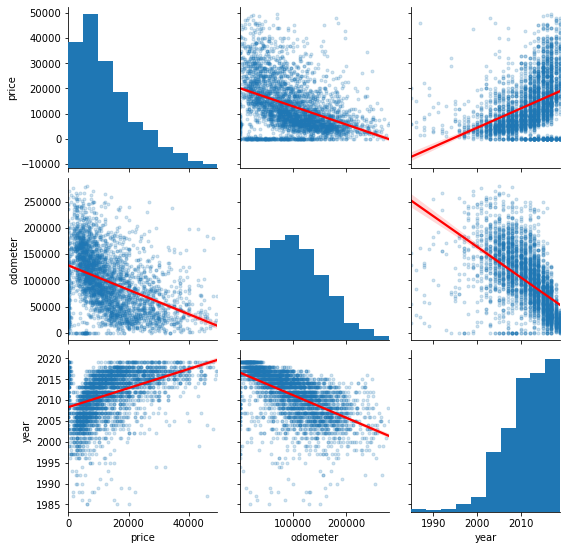

In [87]:
graph = sns.PairGrid(usedcars1_q)
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter,marker='.', alpha=.2)
graph = graph.map_offdiag(sns.regplot, scatter=False, color='r')


In [88]:
## Primero nuestra variable de interés
Y1 = usedcars1['price'].copy()

# Nuestra primeras variables que usaremos para estimar
X1 = usedcars1[['odometer', 'year']]


In [89]:
## split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state=45)


## 1.1 Tree

In [90]:
## create a decisiont tree and fit it to the training data
tree1 = DecisionTreeRegressor(random_state=42).fit(X_train1, y_train1)

predict_y1 = tree1.predict(X_test1)

mse = np.sqrt(mean_squared_error(y_test1, predict_y1))

print(mse)

16030.516238806304


Queremos Minimizar la siguiente función de complejidad:

$$R_\alpha(T) = R(T) + \alpha|T|$$

Por lo que elegiremos el alpha que arroje el menor mse

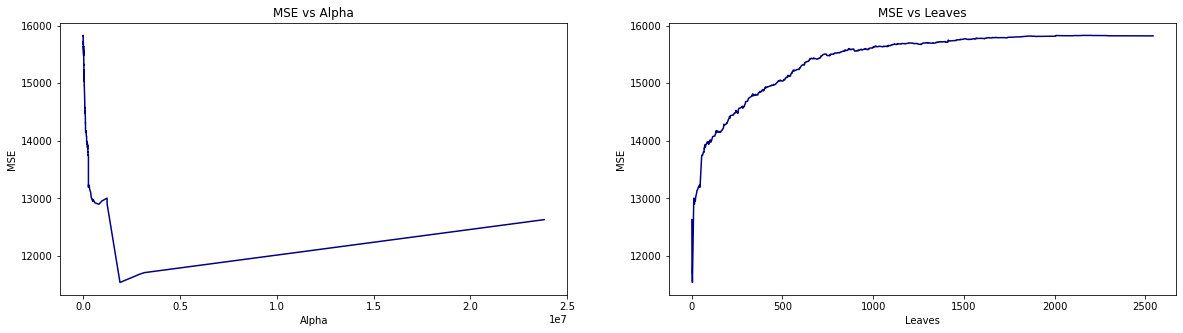

In [91]:
# Utilizamos la función de cost_complexity_pruning_path para estimar una lista de las diferentes alphas que puede tomar el modelo
alphas = tree1.cost_complexity_pruning_path(X_train1, y_train1).ccp_alphas 

#alphas = range(0,100000,10)

lista_modelos = []

depth_list = []

## Creamos un modelo de arboles de decisión por cada alpha posible
for alp in np.unique(alphas):
    tree_ = DecisionTreeRegressor(random_state=1, ccp_alpha=alp).fit(X_train1, y_train1)
    depth = tree_.get_n_leaves()
    lista_modelos.append(tree_)
    depth_list.append(depth)

# Creamos una lista con los valores que podemos predecir del set de evaluación 
predict_list = [x.predict(X_test1) for x in lista_modelos]

# Creamos una lista con los valores de los errores al cuadrado
mse_list = [np.sqrt(mean_squared_error(y_test1, y_pred)) for y_pred in predict_list]

# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(np.unique(alphas), mse_list, color='navy')
ax1.set_ylabel('MSE'), ax1.set_xlabel('Alpha')
ax1.set_title('MSE vs Alpha')

ax2.plot(depth_list, mse_list, color='navy')
ax2.set_ylabel('MSE'), ax2.set_xlabel('Leaves')
ax2.set_title('MSE vs Leaves')

plt.show()

In [92]:
print('El valor de alpha que minimiza el MSE es: {}\nEl MSE es: {}\nY el arbol tiene {} hojas'.format(np.unique(alphas)[np.argmin(mse_list)], 
                                                                                                        mse_list[np.argmin(mse_list)],
                                                                                                        depth_list[np.argmin(mse_list)]))

El valor de alpha que minimiza el MSE es: 1903177.8145519292
El MSE es: 11540.976191069825
Y el arbol tiene 4 hojas


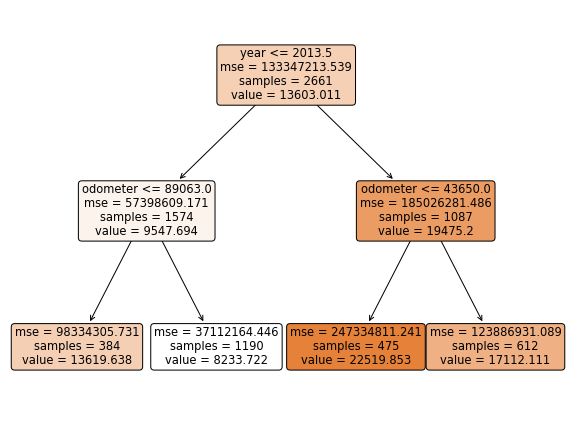

In [93]:
# Imprimimos el arbol
plt.figure(figsize=(10, 7.5))
plot_tree(lista_modelos[np.argmin(mse_list)], 
          filled=True, 
          rounded=True, 
          feature_names=X1.columns)
plt.show()

## 1.2 Random Forest

In [94]:
## Creamos el random forest en donde utilizamos el alpha que minimiza el mse del tree pasado y con n arboles

rango_forest = range(20, 250)
oob_list = []
error_y_list = []

for n_arboles in rango_forest:
    tree1_forest = RandomForestRegressor(n_estimators=n_arboles, max_features= 'sqrt', bootstrap=True, max_samples = 1000, random_state=42, oob_score=True,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)
    
    oob = tree1_forest.oob_prediction_
    
    error_oob = np.sqrt(mean_squared_error(y_train1, oob))
    
    oob_list.append(error_oob)
    
    y_pred = tree1_forest.predict(X_test1)
    
    error_y_test = np.sqrt(mean_squared_error(y_test1, y_pred))
    
    error_y_list.append(error_y_test)
    

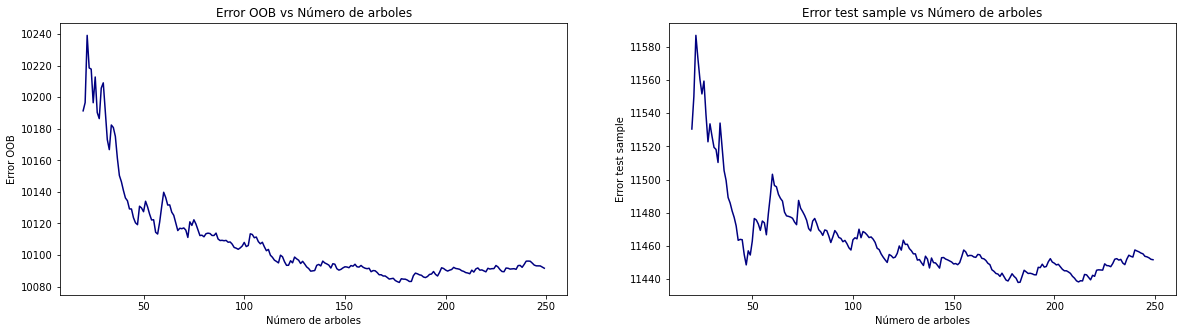

In [95]:
# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(rango_forest, oob_list, color='navy')
ax1.set_ylabel('Error OOB'), ax1.set_xlabel('Número de arboles')
ax1.set_title('Error OOB vs Número de arboles')

ax2.plot(rango_forest, error_y_list, color='navy')
ax2.set_ylabel('Error test sample'), ax2.set_xlabel('Número de arboles')
ax2.set_title('Error test sample vs Número de arboles')

plt.show()

In [96]:
# Corremos de nuevo el arbol con el error de OOB más bajo
tree1_forest = RandomForestRegressor(n_estimators=rango_forest[np.argmin(oob_list)], max_features= 'sqrt', bootstrap=True, max_samples = 1000, random_state=42, oob_score=True,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)

y_pred_for = tree1_forest.predict(X_test1)

mse_random_forest = np.sqrt(mean_squared_error(y_test1, y_pred_for))

print('El valor del mse con el random forest es {}'.format(mse_random_forest))

El valor del mse con el random forest es 11438.93707661121


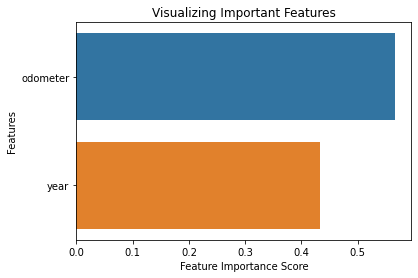

In [97]:
# Calculamos la imrpotancia de cada variable
feature_imp = pd.Series(tree1_forest.feature_importances_,index=X1.columns).sort_values(ascending=False)

#Graficamos
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 1.3 Gradient Boosting

In [1]:
learning_r = [i/100 for i in range(1,101)]

error_list = []
predict_stages = []

for lr in learning_r:
    
    tree1_gb_ = GradientBoostingRegressor(loss = 'ls', learning_rate= lr, n_estimators=500, random_state=42, subsample=.5,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)
    
    y_pred_gb_ = tree1_gb_.predict(X_test1)
    
    error_ = np.sqrt(mean_squared_error(y_test1, y_pred_gb_))
    
    error_list.append(error_)
    
    predict_stages.append(tree1_gb_.staged_predict(X_test1))


NameError: name 'GradientBoostingRegressor' is not defined

In [99]:
print('El valor del Learning Rate que minimiza el MSE con el Gradient Boosting es {}'.format(learning_r[np.argmin(error_list)]))

El valor del Learning Rate que minimiza el MSE con el Gradient Boosting es 0.65


In [100]:
tree1_gb = GradientBoostingRegressor(loss = 'ls', learning_rate= learning_r[np.argmin(error_list)], n_estimators=500, random_state=42, subsample=.5,
                                     ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)

y_pred_gb = tree1_gb.predict(X_test1)

error_gb = np.sqrt(mean_squared_error(y_test1, y_pred_gb))

stages_best_gb = tree1_gb.staged_predict(X_test1)



In [101]:
print('El valor MSE del mejor modelo de Gradien boosting es {}'.format(error_gb))

El valor MSE del mejor modelo de Gradien boosting es 11276.173993453522


In [102]:
# Primero creamos un loop para extraer los generadores y obtenemos una lista con el numero de modelos 

stages_best_gb = [x for x in stages_best_gb]

stages_errors = []

# Hacemos otro loop para extraer los errores de cada uno de los modelos
for x in range(len(stages_best_gb)):
   
    error_pred = np.sqrt(mean_squared_error(y_test1, stages_best_gb[x]))

    stages_errors.append(error_pred)


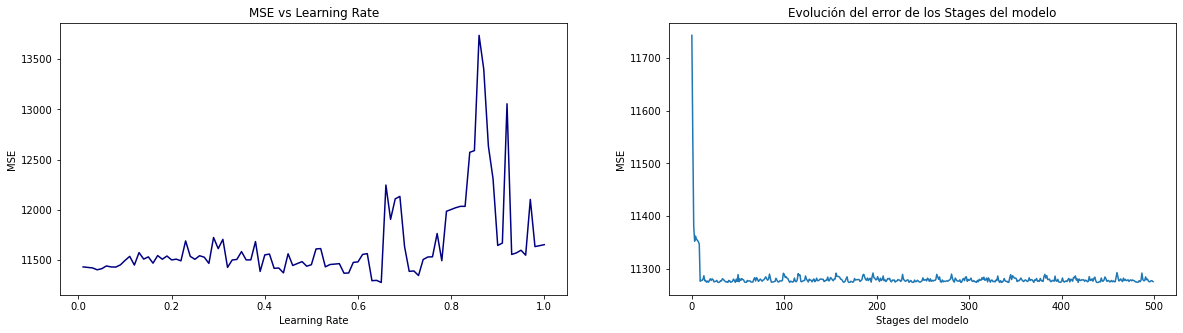

In [103]:
# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(learning_r, error_list, color='navy')
ax1.set_ylabel('MSE'), ax1.set_xlabel('Learning Rate')
ax1.set_title('MSE vs Learning Rate')


ax2.plot(range(len(stages_errors)), stages_errors) 
ax2.set_ylabel('MSE'), ax2.set_xlabel('Stages del modelo')
ax2.set_title('Evolución del error de los Stages del modelo')

plt.show()

## 1.4 XGBoost

In [104]:
# Convertimos los datos en DMatriz, que la paquetería íde para el cálculo del XGBoost
data_dmatrix = xgb.DMatrix(data=X1,label=Y1)


In [105]:
learning_rate = [x/100 for x in range(1,100,1)]

error_list_xgb = []

## Corremos un loop para encontrar el learning rate con menor error
for lr in learning_rate:
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = lr, n_estimators = 250, subsample = .4)

    xg_reg.fit(X_train1, y_train1)

    preds_xgb = xg_reg.predict(X_test1)

    error_pred_xgb = np.sqrt(mean_squared_error(y_test1, preds_xgb))
    
    error_list_xgb.append(error_pred_xgb)

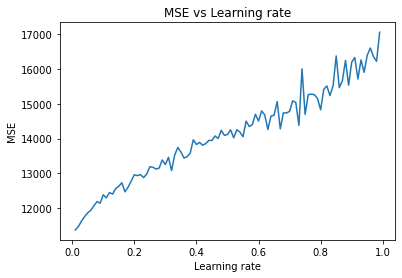

In [106]:
## Graficamos
plt.plot(learning_rate, error_list_xgb) 
plt.ylabel('MSE'), plt.xlabel('Learning rate')
plt.title('MSE vs Learning rate')

plt.show()

In [107]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = learning_rate[np.argmin(error_list_xgb)], n_estimators = 250, subsample = .4)

xg_reg.fit(X_train1, y_train1)

preds_xgb = xg_reg.predict(X_test1)

error_pred_xgb = np.sqrt(mean_squared_error(y_test1, preds_xgb))

print('El valor MSE del mejor modelo de XGBoost es {}'.format(error_pred_xgb))

El valor MSE del mejor modelo de XGBoost es 11380.832344921198


## 1.5 Modelo lineal

In [108]:
reg1 = LinearRegression().fit(X_train1, y_train1)

y_pred_lineal = reg1.predict(X_test1)

error_lineal = np.sqrt(mean_squared_error(y_test1, y_pred_lineal))

In [109]:
# Ahora comparamos los MSE de los 3 modelos, para lo anterior, creamos una Dataframe para verlo a manera de tabla
modelos = pd.DataFrame({'modelo': [1],
                         'Tree': [mse_list[np.argmin(mse_list)]],
                        'Random Forest': [mse_random_forest],
                        'Gradient Boosting Tree': [error_gb],
                        'XGBoosting': [error_pred_xgb],
                        'Lineal': [error_lineal]})

modelos

,modelo,Tree,Random Forest,Gradient Boosting Tree,XGBoosting,Lineal
0,1,"11,540.98","11,438.94","11,276.17","11,380.83","12,086.85"


# 2. Modelo 2: con todas las variables

In [110]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4358 entries, 321867 to 67801
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4358 non-null   int64  
 1   url           4358 non-null   object 
 2   region        4358 non-null   object 
 3   region_url    4358 non-null   object 
 4   price         4358 non-null   int64  
 5   year          4353 non-null   float64
 6   manufacturer  4168 non-null   object 
 7   model         4298 non-null   object 
 8   condition     2487 non-null   object 
 9   cylinders     2685 non-null   object 
 10  fuel          4332 non-null   object 
 11  odometer      3554 non-null   float64
 12  title_status  4346 non-null   object 
 13  transmission  4335 non-null   object 
 14  vin           2313 non-null   object 
 15  drive         3099 non-null   object 
 16  size          1347 non-null   object 
 17  type          3168 non-null   object 
 18  paint_color   2972 non

In [111]:

## Primero quitamos los valores nulos de las variables continuas
usedcars2 = usedcars[['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 
                      'fuel', 'odometer', 'title_status', 'transmission', 'drive', 
                      'size', 'type', 'paint_color']].dropna(how='any', subset=['price', 'odometer', 'year'])

## Luego rellenamos las variables categoricas que son nulas con un categoría que denominaremos "sin_info" para no perder información
usedcars2 = usedcars2[['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 
                      'fuel', 'odometer', 'title_status', 'transmission', 'drive', 
                      'size', 'type', 'paint_color']].fillna('sin_info').copy()


In [112]:
# Terminamos con el siguiente data frame
usedcars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 19846 to 67801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3549 non-null   int64  
 1   year          3549 non-null   float64
 2   manufacturer  3549 non-null   object 
 3   model         3549 non-null   object 
 4   condition     3549 non-null   object 
 5   cylinders     3549 non-null   object 
 6   fuel          3549 non-null   object 
 7   odometer      3549 non-null   float64
 8   title_status  3549 non-null   object 
 9   transmission  3549 non-null   object 
 10  drive         3549 non-null   object 
 11  size          3549 non-null   object 
 12  type          3549 non-null   object 
 13  paint_color   3549 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 415.9+ KB


In [113]:
## Juntamos en una misma columna las variables de manufacturer y model
usedcars2['model_manu'] = usedcars2['manufacturer'] + '__' + usedcars2['model'] 

usedcars2 = usedcars2.drop(columns=['manufacturer', 'model'])


In [114]:
## Creamos nuestra variable de interés
Y2 = usedcars2['price'].copy()

# Nuestra primeras variables que usaremos para estimar
X2 = usedcars2[['year', 'model_manu', 'condition', 'cylinders', 
                'fuel', 'odometer', 'title_status', 'transmission', 'drive', 
                'size', 'type', 'paint_color']].copy()


In [115]:
## Hacemos un hot encoding para convertir las variables categóricas en dummies
X2 = pd.get_dummies(X2, columns=['model_manu', 'condition', 'cylinders', 
                                   'fuel', 'title_status', 'transmission', 'drive', 
                                   'size', 'type', 'paint_color'])

In [116]:
# Expandimos nuestra base y ahora tenemos muchas columnas
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 19846 to 67801
Columns: 1679 entries, year to paint_color_yellow
dtypes: float64(2), uint8(1677)
memory usage: 5.8 MB


In [117]:
## split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, Y2, random_state=45)


## 2.1 Tree

In [118]:
## create a decisiont tree and fit it to the training data
tree1 = DecisionTreeRegressor(random_state=42).fit(X_train1, y_train1)

predict_y1 = tree1.predict(X_test1)

mse = np.sqrt(mean_squared_error(y_test1, predict_y1))

print(mse)

11485.48693529211


Queremos Minimizar la siguiente función de complejidad:

$$R_\alpha(T) = R(T) + \alpha|T|$$

Por lo que elegiremos el alpha que arroje el menor mse

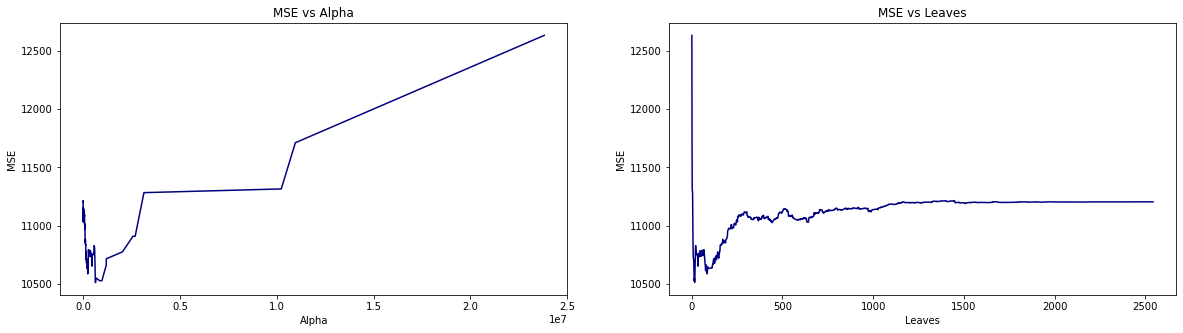

In [119]:
# Utilizamos la función de cost_complexity_pruning_path para estimar una lista de las diferentes alphas que puede tomar el modelo
alphas = tree1.cost_complexity_pruning_path(X_train1, y_train1).ccp_alphas 

#alphas = range(0,100000,10)

lista_modelos = []

depth_list = []

## Creamos un modelo de arboles de decisión por cada alpha posible
for alp in np.unique(alphas):
    tree_ = DecisionTreeRegressor(random_state=1, ccp_alpha=alp).fit(X_train1, y_train1)
    depth = tree_.get_n_leaves()
    lista_modelos.append(tree_)
    depth_list.append(depth)

# Creamos una lista con los valores que podemos predecir del set de evaluación 
predict_list = [x.predict(X_test1) for x in lista_modelos]

# Creamos una lista con los valores de los errores al cuadrado
mse_list = [np.sqrt(mean_squared_error(y_test1, y_pred)) for y_pred in predict_list]

# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(np.unique(alphas), mse_list, color='navy')
ax1.set_ylabel('MSE'), ax1.set_xlabel('Alpha')
ax1.set_title('MSE vs Alpha')

ax2.plot(depth_list, mse_list, color='navy')
ax2.set_ylabel('MSE'), ax2.set_xlabel('Leaves')
ax2.set_title('MSE vs Leaves')

plt.show()

In [120]:
print('El valor de alpha que minimiza el MSE es: {}\nEl MSE es: {}\nY el arbol tiene {} hojas'.format(np.unique(alphas)[np.argmin(mse_list)], 
                                                                                                        mse_list[np.argmin(mse_list)],
                                                                                                        depth_list[np.argmin(mse_list)]))

El valor de alpha que minimiza el MSE es: 626659.8233245956
El MSE es: 10513.698871964774
Y el arbol tiene 17 hojas


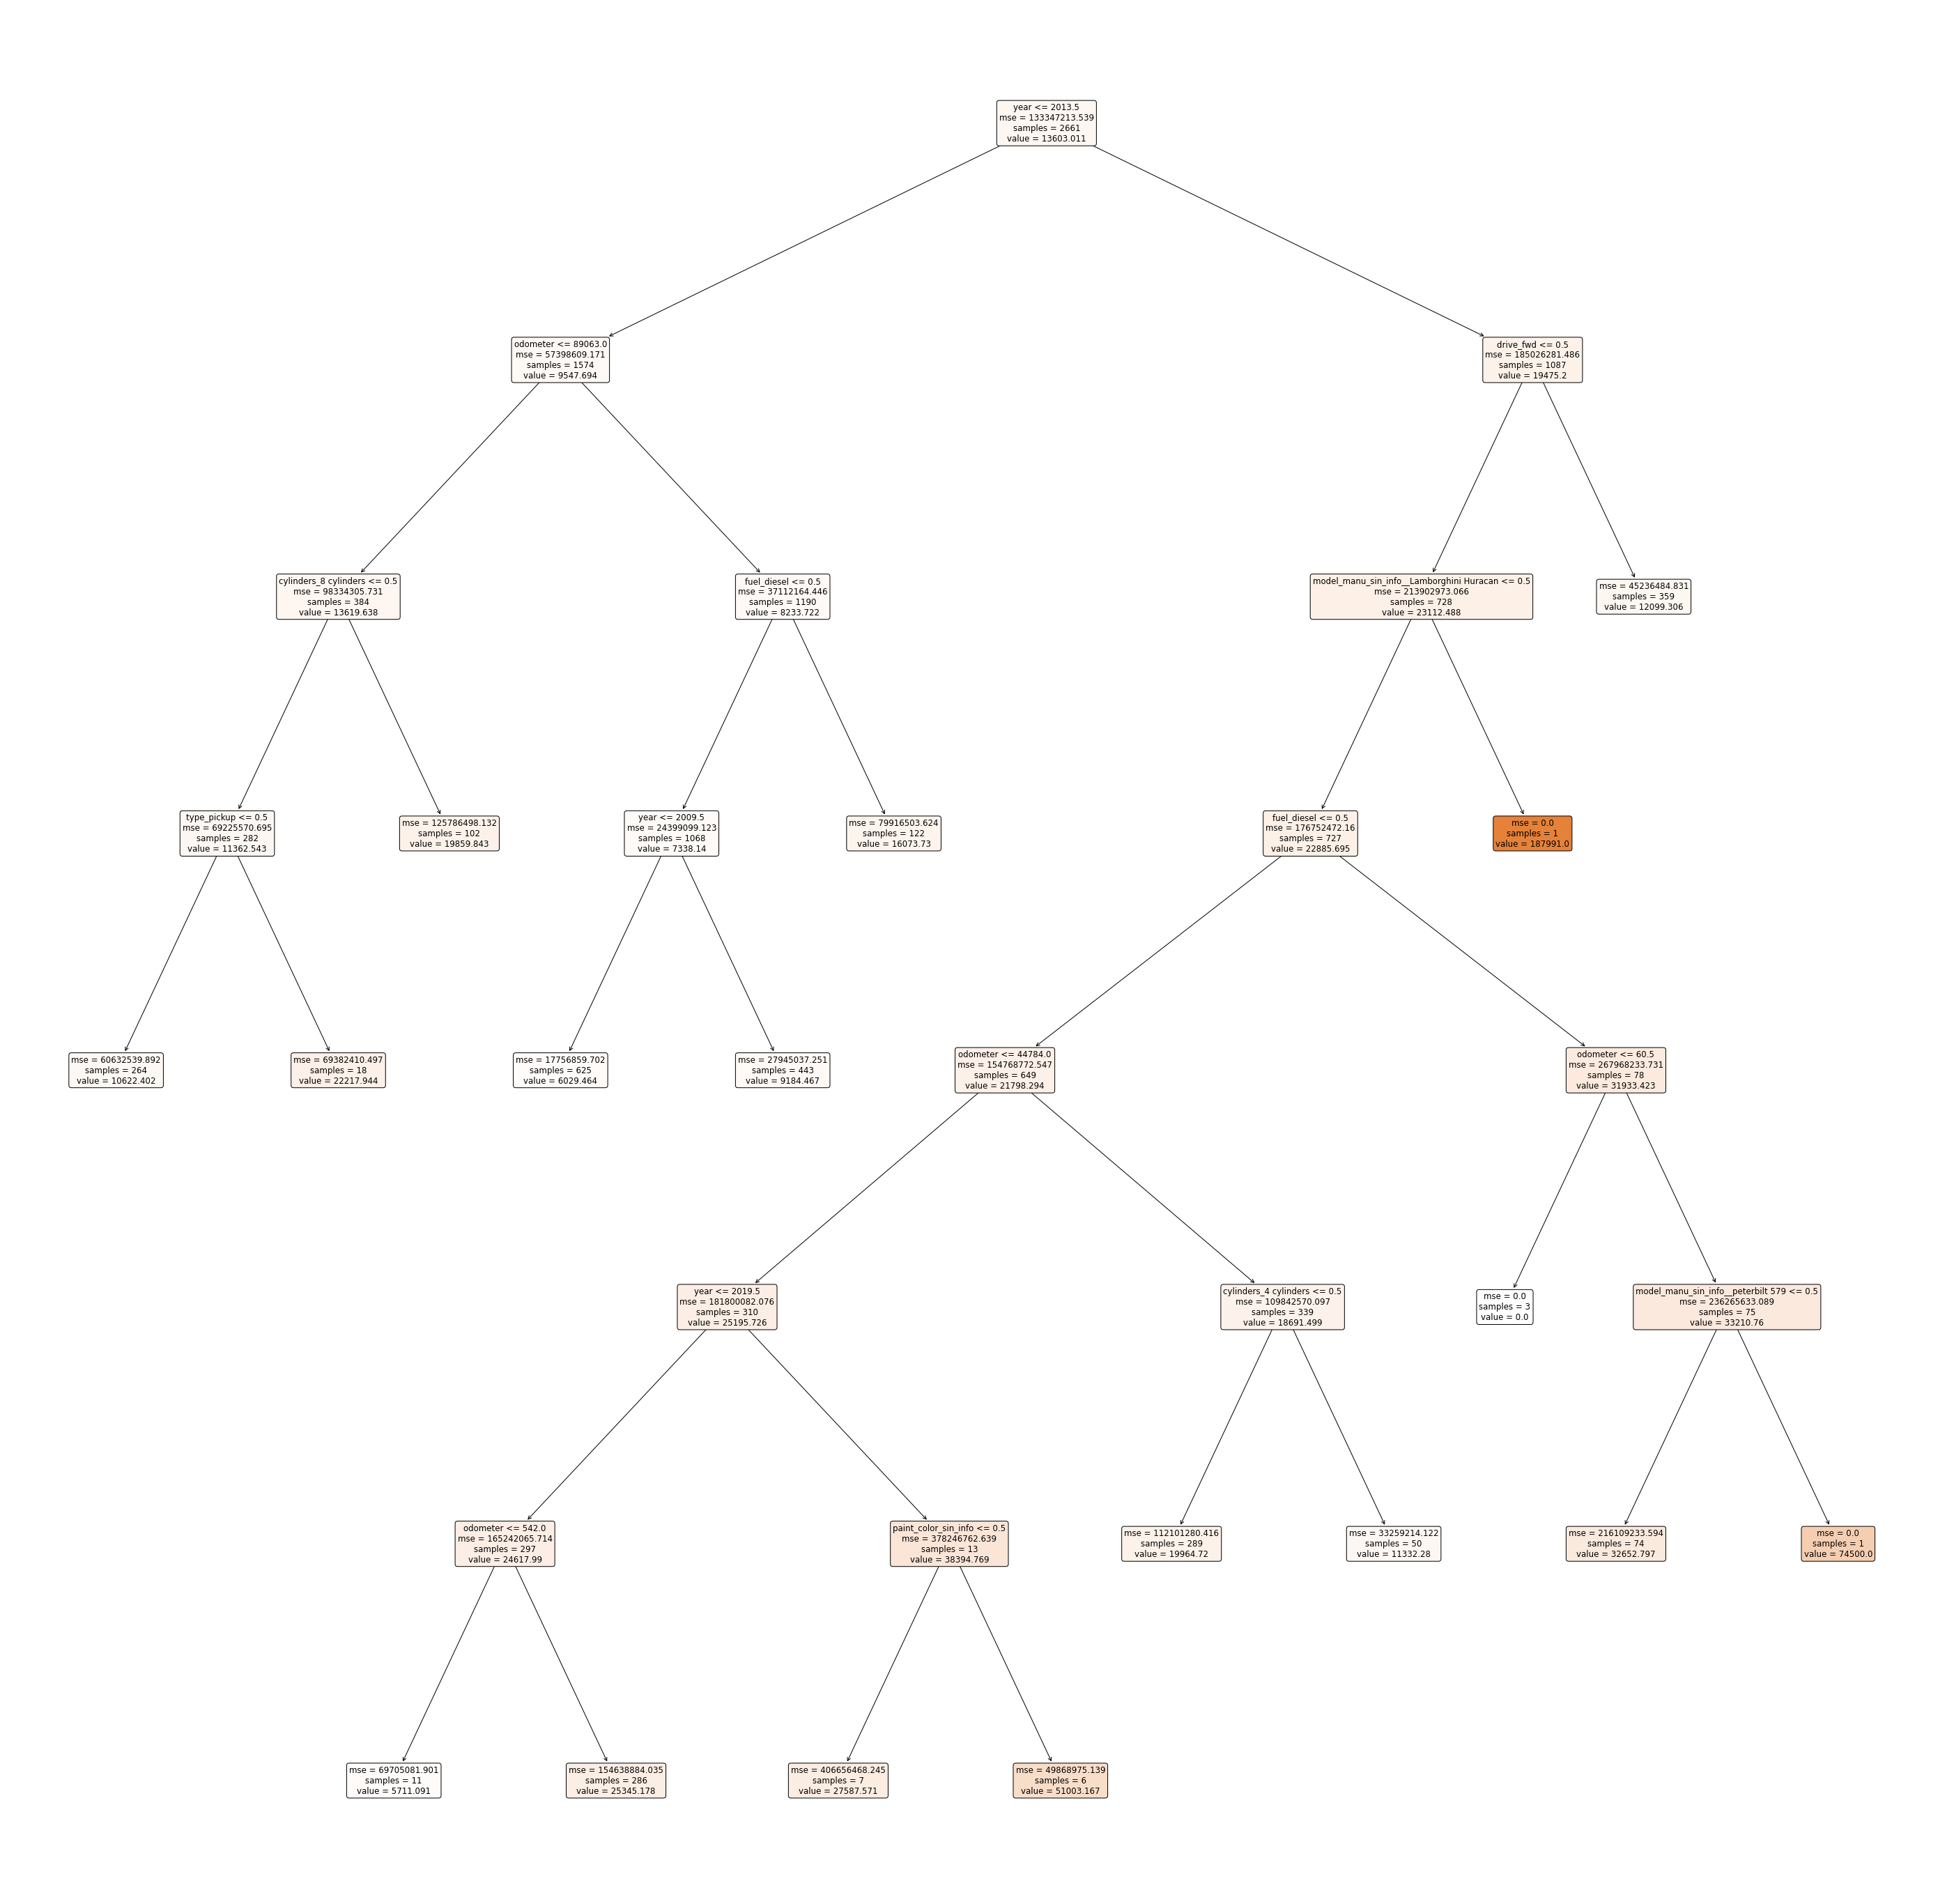

In [121]:
# Imprimimos el arbol
plt.figure(figsize=(50, 50))
plot_tree(lista_modelos[np.argmin(mse_list)], 
          filled=True, 
          rounded=True, 
          feature_names=X2.columns)
plt.show()

## 2.2 Random Forest

In [122]:
## Creamos el random forest en donde utilizamos el alpha que minimiza el mse del tree pasado y con n arboles

rango_forest = range(20, 250)
oob_list = []
error_y_list = []

for n_arboles in rango_forest:
    tree1_forest = RandomForestRegressor(n_estimators=n_arboles, max_features= 'sqrt', bootstrap=True, max_samples = 1000, random_state=42, oob_score=True,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)
    
    oob = tree1_forest.oob_prediction_
    
    error_oob = np.sqrt(mean_squared_error(y_train1, oob))
    
    oob_list.append(error_oob)
    
    y_pred = tree1_forest.predict(X_test1)
    
    error_y_test = np.sqrt(mean_squared_error(y_test1, y_pred))
    
    error_y_list.append(error_y_test)

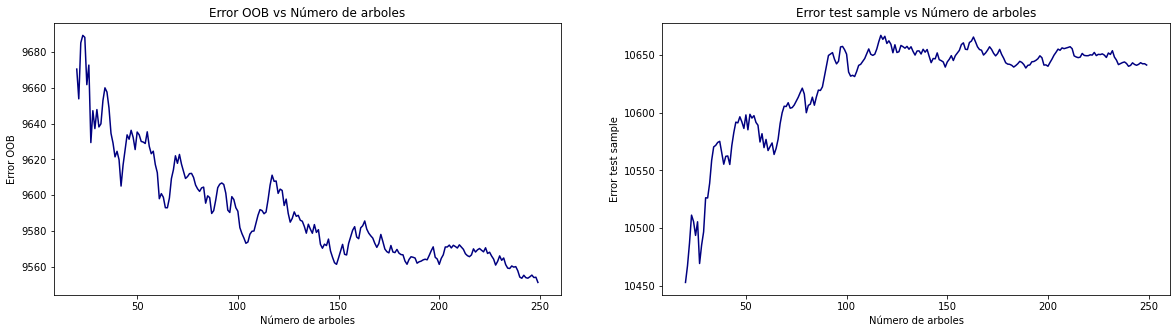

In [123]:
# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(rango_forest, oob_list, color='navy')
ax1.set_ylabel('Error OOB'), ax1.set_xlabel('Número de arboles')
ax1.set_title('Error OOB vs Número de arboles')

ax2.plot(rango_forest, error_y_list, color='navy')
ax2.set_ylabel('Error test sample'), ax2.set_xlabel('Número de arboles')
ax2.set_title('Error test sample vs Número de arboles')

plt.show()

In [124]:
# Corremos de nuevo el arbol con el error de OOB más bajo
tree1_forest = RandomForestRegressor(n_estimators=rango_forest[np.argmin(oob_list)], max_features= 'sqrt', bootstrap=True, max_samples = 1000, random_state=42, oob_score=True,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)

y_pred_for = tree1_forest.predict(X_test1)

mse_random_forest = np.sqrt(mean_squared_error(y_test1, y_pred_for))

print('El valor del mse con el random forest es {}'.format(mse_random_forest))

El valor del mse con el random forest es 10641.450875511468


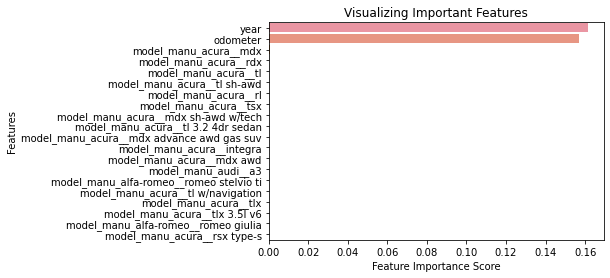

In [125]:
# Calculamos la imrpotancia de cada variable
feature_imp = pd.Series(tree1_forest.feature_importances_[:20],index=X2.columns[:20]).sort_values(ascending=False)

#Graficamos
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 2.3 Gradient Boosting

In [126]:
learning_r = [i/100 for i in range(1,101)]

error_list = []
predict_stages = []

for lr in learning_r:
    
    tree1_gb_ = GradientBoostingRegressor(loss = 'ls', learning_rate= lr, n_estimators=500, random_state=42, subsample=.5,
                                         ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)
    
    y_pred_gb_ = tree1_gb_.predict(X_test1)
    
    error_ = np.sqrt(mean_squared_error(y_test1, y_pred_gb_))
    
    error_list.append(error_)
    
    predict_stages.append(tree1_gb_.staged_predict(X_test1))

In [127]:
print('El valor del Learning Rate que minimiza el MSE con el Gradient Boosting es {}'.format(learning_r[np.argmin(error_list)]))

El valor del Learning Rate que minimiza el MSE con el Gradient Boosting es 0.36


In [128]:
tree1_gb = GradientBoostingRegressor(loss = 'ls', learning_rate= learning_r[np.argmin(error_list)], n_estimators=500, random_state=42, subsample=.5,
                                     ccp_alpha=np.unique(alphas)[np.argmin(mse_list)]).fit(X_train1, y_train1)

y_pred_gb = tree1_gb.predict(X_test1)

error_gb = np.sqrt(mean_squared_error(y_test1, y_pred_gb))

stages_best_gb = tree1_gb.staged_predict(X_test1)


In [129]:
print('El valor MSE del mejor modelo de Gradien boosting es {}'.format(error_gb))

El valor MSE del mejor modelo de Gradien boosting es 9419.459658373768


In [130]:
# Primero creamos un loop para extraer los generadores y obtenemos una lista con el numero de modelos 

stages_best_gb = [x for x in stages_best_gb]

stages_errors = []

# Hacemos otro loop para extraer los errores de cada uno de los modelos
for x in range(len(stages_best_gb)):
   
    error_pred = np.sqrt(mean_squared_error(y_test1, stages_best_gb[x]))

    stages_errors.append(error_pred)

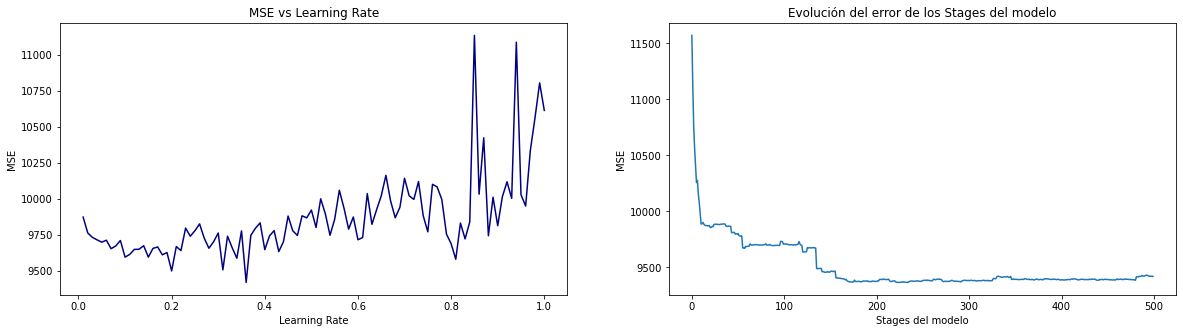

In [131]:
# Graficamos
fig = plt.figure(figsize=(20, 5))

ax1, ax2 = fig.subplots(1, 2)

ax1.plot(learning_r, error_list, color='navy')
ax1.set_ylabel('MSE'), ax1.set_xlabel('Learning Rate')
ax1.set_title('MSE vs Learning Rate')


ax2.plot(range(len(stages_errors)), stages_errors) 
ax2.set_ylabel('MSE'), ax2.set_xlabel('Stages del modelo')
ax2.set_title('Evolución del error de los Stages del modelo')

plt.show()

## 2.4 XGBoost

In [132]:
# Convertimos los datos en DMatriz, que la paquetería íde para el cálculo del XGBoost
data_dmatrix = xgb.DMatrix(data=X1,label=Y1)


In [133]:
learning_rate = [x/100 for x in range(1,100,1)]

error_list_xgb = []

## Corremos un loop para encontrar el learning rate con menor error
for lr in learning_rate:
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = lr, n_estimators = 250, subsample = .4)

    xg_reg.fit(X_train1, y_train1)

    preds_xgb = xg_reg.predict(X_test1)

    error_pred_xgb = np.sqrt(mean_squared_error(y_test1, preds_xgb))
    
    error_list_xgb.append(error_pred_xgb)

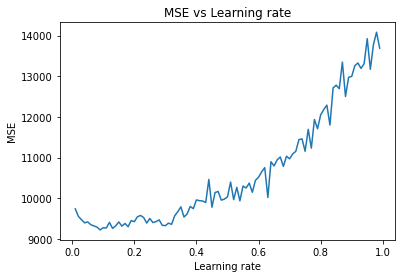

In [134]:
## Graficamos
plt.plot(learning_rate, error_list_xgb) 
plt.ylabel('MSE'), plt.xlabel('Learning rate')
plt.title('MSE vs Learning rate')

plt.show()

In [135]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = learning_rate[np.argmin(error_list_xgb)], n_estimators = 250, subsample = .4)

xg_reg.fit(X_train1, y_train1)

preds_xgb = xg_reg.predict(X_test1)

error_pred_xgb = np.sqrt(mean_squared_error(y_test1, preds_xgb))

print('El valor MSE del mejor modelo de XGBoost es {}'.format(error_pred_xgb))

El valor MSE del mejor modelo de XGBoost es 9218.227402973098


## 2.5 Modelo Lineal

In [136]:
reg1 = LinearRegression().fit(X_train1, y_train1)

y_pred_lineal = reg1.predict(X_test1)

error_lineal = np.sqrt(mean_squared_error(y_test1, y_pred_lineal))

In [137]:
# Ahora comparamos los MSE de los 3 modelos, para lo anterior, creamos una Dataframe para verlo a manera de tabla
modelos2 = pd.DataFrame({'modelo': [2],
                         'Tree': [mse_list[np.argmin(mse_list)]],
                        'Random Forest': [mse_random_forest],
                        'Gradient Boosting Tree': [error_gb],
                        'XGBoosting': [error_pred_xgb],
                        'Lineal': [error_lineal]})

modelos2

,modelo,Tree,Random Forest,Gradient Boosting Tree,XGBoosting,Lineal
0,2,"10,513.70","10,641.45","9,419.46","9,218.23","1,194,363,996.45"


# 3. Comparación de modelos

In [138]:
# Hacemos una tabla con los dos modelos
modelosconcat = pd.concat([modelos, modelos2])

modelosconcat

,modelo,Tree,Random Forest,Gradient Boosting Tree,XGBoosting,Lineal
0,1,"11,540.98","11,438.94","11,276.17","11,380.83","12,086.85"
0,2,"10,513.70","10,641.45","9,419.46","9,218.23","1,194,363,996.45"
